In [ ]:
!pip install datasets

In [ ]:
!gdown --folder https://drive.google.com/drive/folders/1CAbb3DjrOPBNm0ozVBfhvrEh9P9rAppc

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from datasets import load_dataset

# Load your datasets
train_data = load_dataset('json', data_files={'train': '/content/SubtaskA/subtaskA_train_monolingual.jsonl'})
test_data = load_dataset('json', data_files={'test': '/content/SubtaskA/subtaskA_dev_monolingual.jsonl'})

# Prepare training data
train_texts = train_data['train']['text']
train_labels = train_data['train']['label']

# Prepare test data
test_texts = test_data['test']['text']
test_labels = test_data['test']['label']

# Create TF-IDF vectors
tfidf = TfidfVectorizer(max_features=10000, ngram_range=(1, 2))
X_train = tfidf.fit_transform(train_texts)
y_train = train_labels

X_test = tfidf.transform(test_texts)
y_test = test_labels


Generating train split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from sklearn.svm import SVC

# Initialize the SVM classifier
svm_model = SVC(kernel='linear', C=1.0, class_weight='balanced', random_state=42, verbose=True)

# Train the model
svm_model.fit(X_train, y_train)


[LibSVM]

SVC(class_weight='balanced', kernel='linear', random_state=42, verbose=True)

In [ ]:
from joblib import load

svm_model = load('svm_model.joblib')

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator SVC from version 1.3.0 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [ ]:
from sklearn.metrics import classification_report

# Predict the labels for the test set
y_pred = svm_model.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred, target_names=['Human Text', 'Machine-Generated Text']))


                        precision    recall  f1-score   support

            Human Text       0.60      0.90      0.72      2500
Machine-Generated Text       0.80      0.39      0.53      2500

              accuracy                           0.65      5000
             macro avg       0.70      0.65      0.62      5000
          weighted avg       0.70      0.65      0.62      5000



In [ ]:
from joblib import dump

# svm_model is your trained model
dump(svm_model, 'svm_model.joblib')

['svm_model.joblib']

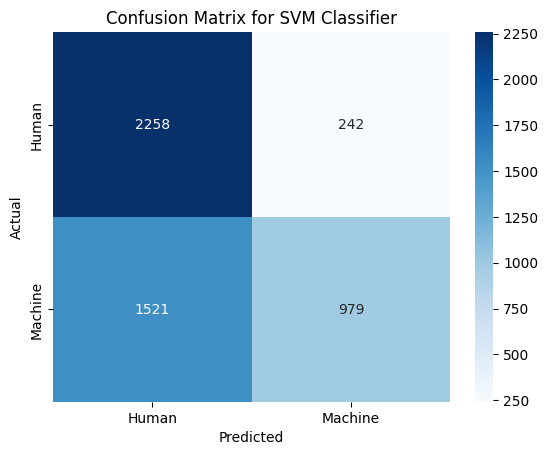

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Human', 'Machine'], yticklabels=['Human', 'Machine'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix for SVM Classifier')
plt.show()


Ablation Study 2

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from datasets import load_dataset
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_fscore_support, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

# Load datasets
data = load_dataset('json', data_files={'train': '/content/SubtaskA/subtaskA_train_monolingual.jsonl', 'test': '/content/SubtaskA/subtaskA_dev_monolingual.jsonl'})

# Text and label data
train_texts = data['train']['text']
train_labels = data['train']['label']
test_texts = data['test']['text']
test_labels = data['test']['label']

Generating train split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

Max Features: 50 - Accuracy: 0.4256, Precision: 0.3549141965678627, Recall: 0.182, F1 Score: 0.24061343204653618


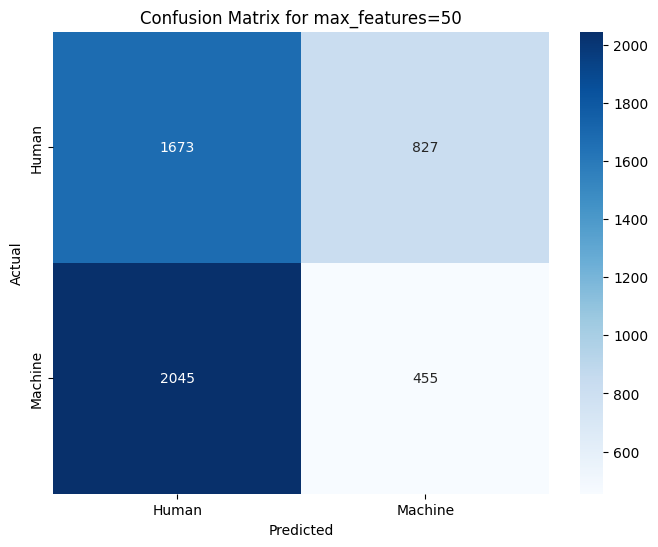

Max Features: 100 - Accuracy: 0.4978, Precision: 0.4962457337883959, Recall: 0.2908, F1 Score: 0.3667087011349307


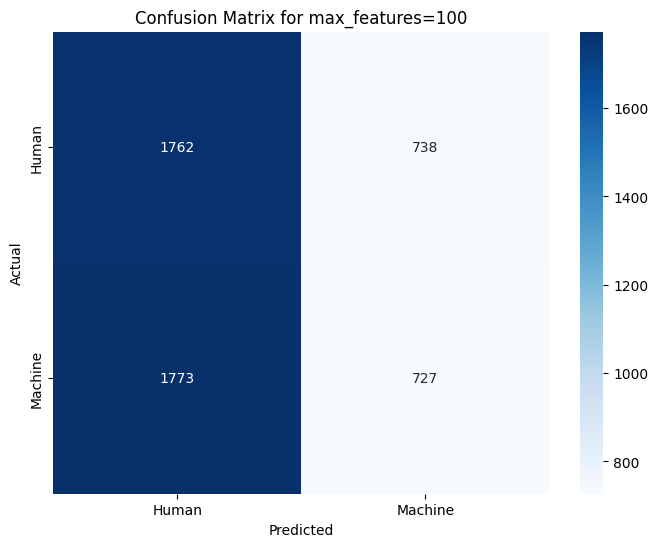

In [ ]:
# Define different max_features values for the ablation study
max_features_values = [50, 100, 500, 1000, 5000]

for max_features in max_features_values:
    # Create TF-IDF vectors
    tfidf = TfidfVectorizer(max_features=max_features, ngram_range=(1, 2))
    X_train = tfidf.fit_transform(train_texts)
    X_test = tfidf.transform(test_texts)

    # Initialize and train the SVM classifier for each max_features setting
    svm_model = SVC(kernel='linear', C=1.0, class_weight='balanced', random_state=42)
    svm_model.fit(X_train, train_labels)

    # Predict the labels for the test set
    y_pred = svm_model.predict(X_test)

    # Calculate metrics
    accuracy = accuracy_score(test_labels, y_pred)
    precision, recall, f1, _ = precision_recall_fscore_support(test_labels, y_pred, average='binary')

    print(f"Max Features: {max_features} - Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, F1 Score: {f1}")

    # Confusion Matrix
    cm = confusion_matrix(test_labels, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Human', 'Machine'], yticklabels=['Human', 'Machine'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title(f'Confusion Matrix for max_features={max_features}')
    plt.show()

    # Optionally, save each model
    joblib.dump(svm_model, f'/content/drive/MyDrive/DeepLearning/Project/SVM/svm_model_{max_features}.joblib')

In [ ]:
# Define different max_features values for the ablation study
max_features_values = [500, 1000, 5000]

for max_features in max_features_values:
    # Create TF-IDF vectors
    tfidf = TfidfVectorizer(max_features=max_features, ngram_range=(1, 2))
    X_train = tfidf.fit_transform(train_texts)
    X_test = tfidf.transform(test_texts)

    # Initialize and train the SVM classifier for each max_features setting
    svm_model = SVC(kernel='linear', C=1.0, class_weight='balanced', random_state=42)
    svm_model.fit(X_train, train_labels)

    # Predict the labels for the test set
    y_pred = svm_model.predict(X_test)

    # Calculate metrics
    accuracy = accuracy_score(test_labels, y_pred)
    precision, recall, f1, _ = precision_recall_fscore_support(test_labels, y_pred, average='binary')

    print(f"Max Features: {max_features} - Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, F1 Score: {f1}")

    # Confusion Matrix
    cm = confusion_matrix(test_labels, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Human', 'Machine'], yticklabels=['Human', 'Machine'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title(f'Confusion Matrix for max_features={max_features}')
    plt.show()

    # Optionally, save each model
    joblib.dump(svm_model, f'/content/drive/MyDrive/DeepLearning/Project/SVM/svm_model_{max_features}.joblib')

# Multiple sources study

In [ ]:
from datasets import load_dataset

# Load datasets
train_data = load_dataset('json', data_files={'train': '/content/SubtaskA/subtaskA_train_monolingual.jsonl'})
dev_data = load_dataset('json', data_files={'dev': '/content/SubtaskA/subtaskA_dev_monolingual.jsonl'})

# Extract texts and labels by source
def extract_data_by_source(dataset):
    data_by_source = {}
    for record in dataset:
        source = record['source']
        if source not in data_by_source:
            data_by_source[source] = {'texts': [], 'labels': []}
        data_by_source[source]['texts'].append(record['text'])
        data_by_source[source]['labels'].append(record['label'])
    return data_by_source

dev_data_by_source = extract_data_by_source(dev_data['dev'])


Generating train split: 0 examples [00:00, ? examples/s]

Generating dev split: 0 examples [00:00, ? examples/s]

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer
tfidf = TfidfVectorizer(max_features=10000, ngram_range=(1, 2))

# Prepare training data
train_texts = train_data['train']['text']

# Create and fit TF-IDF vectors on the training data
X_train = tfidf.fit_transform(train_texts)  # This step fits the vectorizer


In [ ]:

# Transform data for each source
dev_transformed = {}
for source, data in dev_data_by_source.items():
    X_dev = tfidf.transform(data['texts'])  # Ensure the TF-IDF vectorizer is fit on the training data
    y_dev = data['labels']
    dev_transformed[source] = (X_dev, y_dev)


In [ ]:
from joblib import load

svm_model = load('/content/drive/MyDrive/DeepLearning/Project/SVM/svm_model.joblib')


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator SVC from version 1.3.0 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [ ]:
# Function to compute and print basic metrics
def print_basic_metrics(y_true, y_pred, source):
    accuracy = accuracy_score(y_true, y_pred)
    precision, recall, f1, _ = precision_recall_fscore_support(y_true, y_pred, average='binary')
    print(f"Source: {source}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print("\n")

Source: wikihow
Accuracy: 0.6820
Precision: 0.8321
Recall: 0.4560
F1 Score: 0.5891




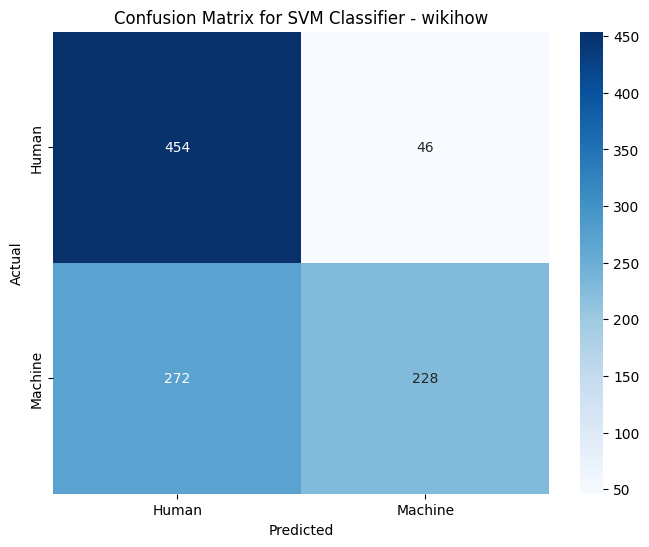

Source: wikipedia
Accuracy: 0.8170
Precision: 0.9415
Recall: 0.6760
F1 Score: 0.7870




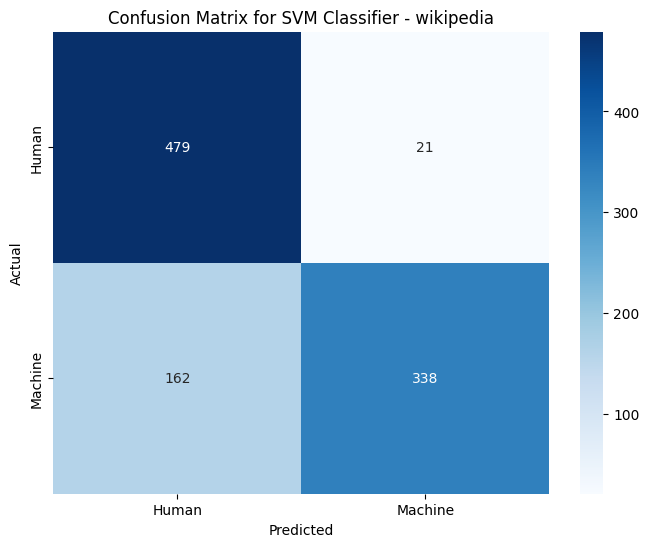

Source: reddit
Accuracy: 0.5670
Precision: 0.8018
Recall: 0.1780
F1 Score: 0.2913




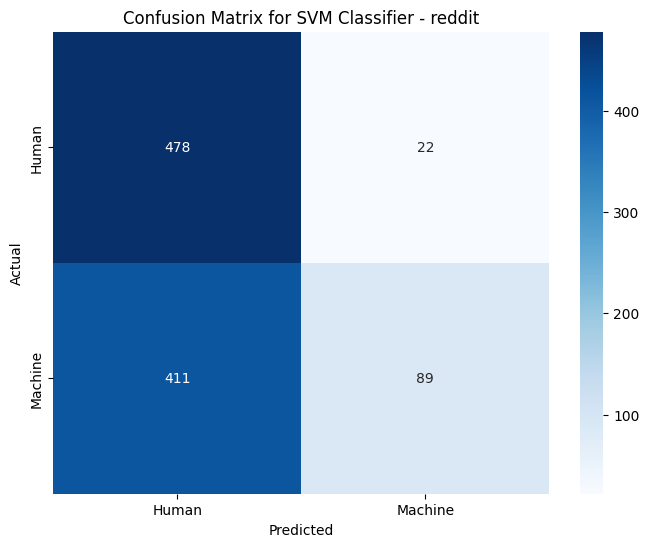

Source: arxiv
Accuracy: 0.6010
Precision: 0.7327
Recall: 0.3180
F1 Score: 0.4435




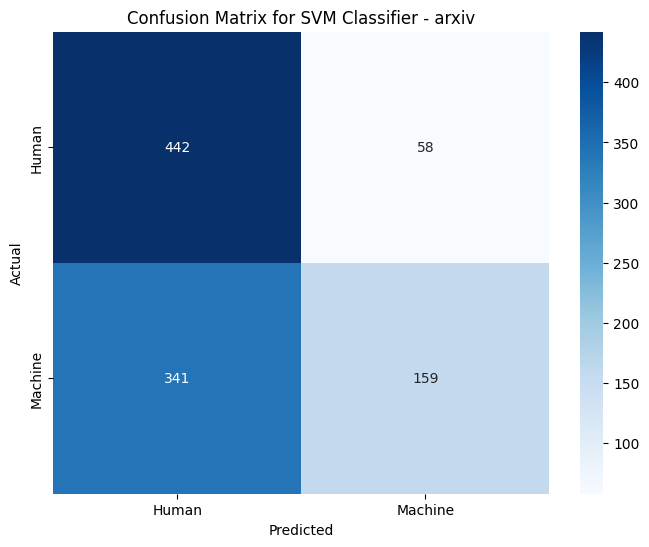

Source: peerread
Accuracy: 0.5700
Precision: 0.6346
Recall: 0.3300
F1 Score: 0.4342




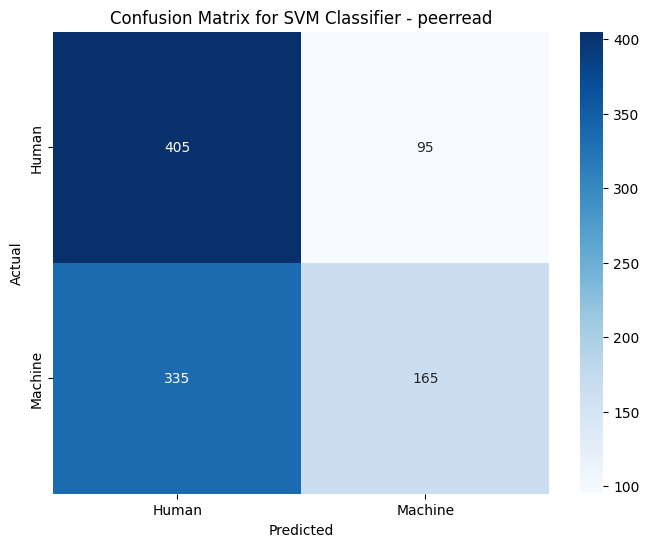

In [ ]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

for source, (X_dev, y_dev) in dev_transformed.items():
    # Predict the labels for the test set
    y_pred = svm_model.predict(X_dev)

    print_basic_metrics(y_dev, y_pred, source)

    # Plot the confusion matrix
    cm = confusion_matrix(y_dev, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Human', 'Machine'], yticklabels=['Human', 'Machine'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title(f'Confusion Matrix for SVM Classifier - {source}')
    plt.show()
